In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/data-expts/master/Health%20Insurance%20Cost%20Prediction/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isna().sum()

age         4
sex         0
bmi         2
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

#Fill the Null Values
#data['age']=data['age'].fillna(data['age'].mean())
#data['bmi']=data['bmi'].fillna(data['bmi'].mean())

#Instantiate SimpleImputer 
si=SimpleImputer(missing_values = np.nan, strategy="median")
si.fit(data[['age', 'bmi']])
  
#Filling missing data with median
data[['age', 'bmi']] = si.transform(data[['age','bmi']])

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.205531,30.663472,1.094918,13270.422265
std,14.049929,6.098183,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# Data Visualization

Now that our data is clean, we will look at analyzing data through visualizations and maps.

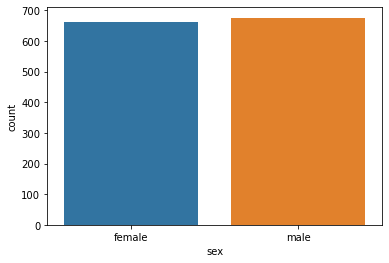

In [10]:
ax = sns.countplot(x='sex', data=data)

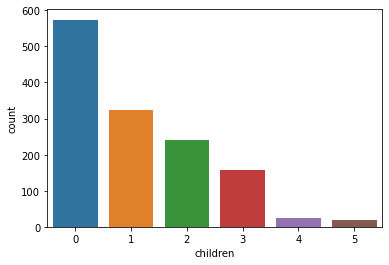

In [11]:
ax=sns.countplot(x='children',data=data)

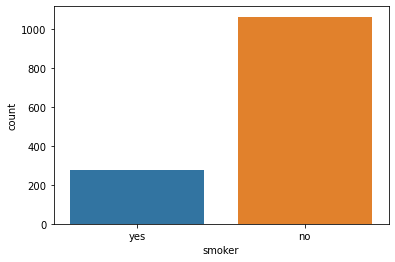

In [12]:
ax = sns.countplot(x='smoker', data=data)

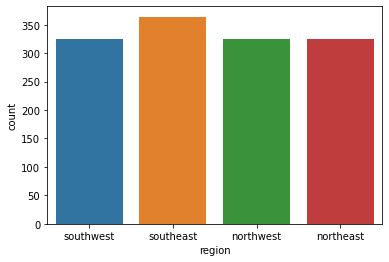

In [13]:
ax = sns.countplot(x='region', data=data)

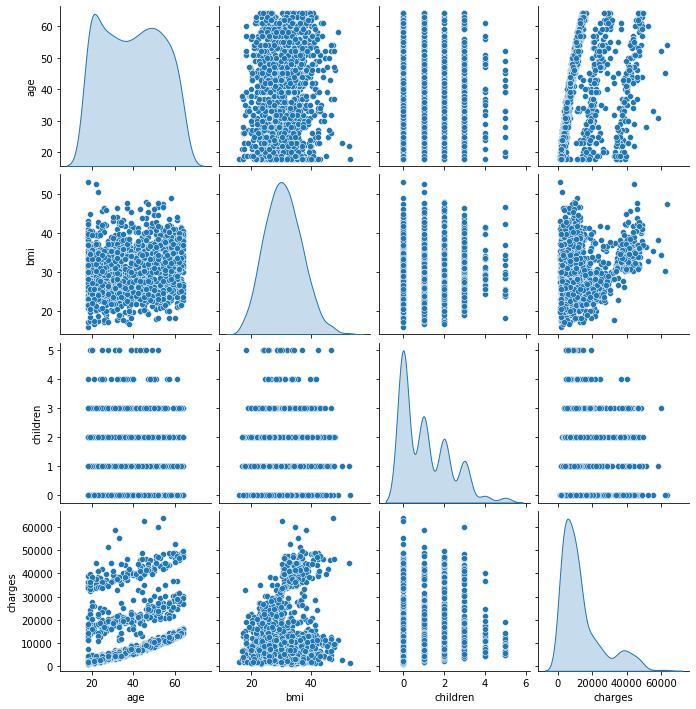

In [14]:
sns.pairplot(data=data, diag_kind='kde')

# What do we see..?

1.Charges and children are skewed.
2.Age shows a positive correlation with Charges.
3.BMI follows a normal distribution! 

<AxesSubplot:xlabel='sex', ylabel='charges'>

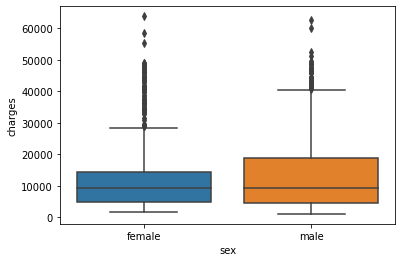

In [15]:
sns.boxplot(x='sex',y='charges',data=data)

<AxesSubplot:xlabel='children', ylabel='charges'>

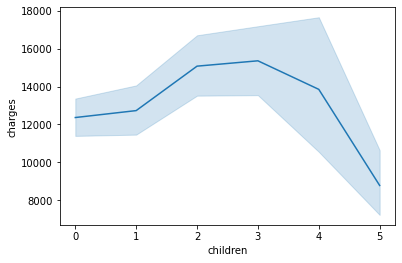

In [16]:
sns.lineplot(x='children',y='charges',data=data)

# Observations based on the above plots:

Males and females are almost equal in number and on average median charges of males and females are also the same, but males have a higher range of charges.
Insurance charges are relatively higher for smokers.
Charges are highest for people with 2–3 children
Customers are almost equally distributed across the 4 regions and all of them have almost the same charges.
Percentage of female smokers is less than the percentage of male smokers.

# Heat Map :
Let’s create a heatmap to understand the strength of the correlation between charges and numeric features — age, BMI, and children.

<AxesSubplot:>

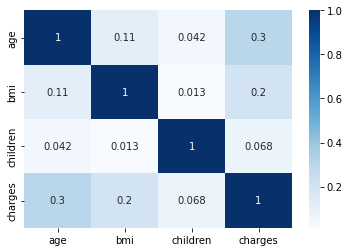

In [17]:
sns.heatmap(data.corr(),cmap='Blues',annot=True)

We see that age and BMI have an average +ve correlation with charges.

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
cat_col=['sex','smoker','region']

In [20]:
#lebel Encoding.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
    data[i]=le.fit_transform(data[i])

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520


In [22]:
#One Hot Coding:
data= pd.get_dummies(data, columns=['region'])

In [23]:
data.head()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3
0,19.0,0,27.900,0,1,16884.92400,0,0,0,1
1,18.0,1,33.770,1,0,1725.55230,0,0,1,0
2,28.0,1,33.000,3,0,4449.46200,0,0,1,0
3,33.0,1,22.705,0,0,21984.47061,0,1,0,0
4,32.0,1,28.880,0,0,3866.85520,0,1,0,0


In [24]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'region_0',
       'region_1', 'region_2', 'region_3'],
      dtype='object')

# Standardization process
Once we have selected our features, we need to ‘standardize’ the numeric ones — age, BMI, children. Standardization process converts data to smaller values in the range 0 to 1 so that all of them lie on the same scale and one doesn’t overpower the other. I have used StandardScaler here.

In [25]:
X=data.drop(columns='charges')
Y=data.charges

In [26]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

#for the normalization


In [27]:
x_scaled.shape[1]

9

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Finding the multicollinerity
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=X.columns

#let's check the values
vif

,vif,Features
0,1.016819,age
1,1.008907,sex
2,1.106632,bmi
3,1.004009,children
4,1.012071,smoker
5,inf,region_0
6,inf,region_1
7,inf,region_2
8,inf,region_3


In [29]:
#Importing Libraries required for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [30]:
#Finding Best Random State
max_score=0
random_state=0
for i in range(0,100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=i,test_size=0.24)
    LR=LinearRegression()
    LR.fit(X_train,Y_train)
    pred=LR.predict(X_test)
    r2score=r2_score(Y_test,pred)
    if max_score<r2score:
        max_score=r2score
        random_state=i
        print('r2score is :',max_score,'random_state is :',random_state)

r2score is : 0.7918375394519933 random_state is : 0
r2score is : 0.7931735557214517 random_state is : 11
r2score is : 0.8006173948864252 random_state is : 13


In [31]:
#Our model gives best accuracy of 80% on random state 13.

#Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=13,test_size=0.28)

In [32]:
#ML Alogrithms
#Linear Regression
lr=LinearRegression()
lr.fit(X_train,Y_train)
predlr=lr.predict(X_test)
print(r2_score(Y_test,predlr))
#Metrics to evaluate your model 
r2_score(Y_test, predlr), mean_absolute_error(Y_test, predlr), np.sqrt(mean_squared_error(Y_test, predlr))

0.7916096130490675


(0.7916096130490675, 3837.850537161851, 5413.231316415858)

In [33]:
#Decision Tree Regression
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
preddtr=dtr.predict(X_test)
r2_score(Y_test, preddtr), mean_absolute_error(Y_test, preddtr), np.sqrt(mean_squared_error(Y_test,preddtr))

(0.7760056432225246, 2471.3668394, 5612.2406307570245)

In [34]:
#Random Forest Regression
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
predrfr=rfr.predict(X_test)
r2_score(Y_test, predrfr), mean_absolute_error(Y_test, predrfr), np.sqrt(mean_squared_error(Y_test,predrfr))

(0.8840052683520923, 2301.2444881893384, 4038.6561340568023)

In [35]:
#KNeighborsRegression
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
predknn=knn.predict(X_test)
r2_score(Y_test, predknn), mean_absolute_error(Y_test, predknn), np.sqrt(mean_squared_error(Y_test,predknn))

(0.1345046064084695, 7600.660029364801, 11031.895148092482)

# Cross Validation Score

In [36]:
#Linear Regression
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(lr,X,Y,cv=5)
print('Cross Validation Score :', scr1.mean())

Cross Validation Score : 0.746869814787232


In [37]:
#Decision Tree regression
scr2=cross_val_score(dtr,X,Y,cv=5)
print('Cross Validation Score :', scr2.mean())

Cross Validation Score : 0.6940039414573472


In [38]:
#Random Forest Regression
scr3=cross_val_score(rfr,X,Y,cv=5)
print('Cross Validation Score :', scr3.mean())

Cross Validation Score : 0.837797295973064


In [39]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
gcv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

gcv.fit(X_train,Y_train)
gcv.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


KeyboardInterrupt: 

In [ ]:
#Predicting values from Grid SearchCV
predgcv=gcv.best_estimator_.predict(X_test)
r2_score(Y_test,predgcv)

# Feature Engineering

We can improve our model score by manipulating some of the features in the dataset. After a couple of trials, I found that the following items improve accuracy:

1. Grouping similar customers into clusters using KMeans.
2. Clubbing northeast and northwest regions into ‘north’ and southeast and southwest into ‘south’ in Region column.
3. Transforming ‘children’ into a categorical feature called ‘more_than_one_child’ which is ‘Yes’ if the number of children is > 1

In [40]:
from sklearn.cluster import KMeans
features=['age', 'bmi', 'smoker', 'children', 'region_0', 'region_1', 'region_2', 'region_3']

kmeans=KMeans(n_clusters=2)
kmeans.fit(data[features])

data['cust_type'] = kmeans.predict(data[features])
data['more_than_1_child']=data.children.apply(lambda x:1 if x>1 else 0)

In [41]:
data.head()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3,cust_type,more_than_1_child
0,19.0,0,27.900,0,1,16884.92400,0,0,0,1,1,0
1,18.0,1,33.770,1,0,1725.55230,0,0,1,0,1,0
2,28.0,1,33.000,3,0,4449.46200,0,0,1,0,1,1
3,33.0,1,22.705,0,0,21984.47061,0,1,0,0,1,0
4,32.0,1,28.880,0,0,3866.85520,0,1,0,0,1,0


In [42]:
data['location_north']=data['region_0']+data['region_1']
data['location_south']=data['region_2']+data['region_3']

In [43]:
data.head()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3,cust_type,more_than_1_child,location_north,location_south
0,19.0,0,27.900,0,1,16884.92400,0,0,0,1,1,0,0,1
1,18.0,1,33.770,1,0,1725.55230,0,0,1,0,1,0,0,1
2,28.0,1,33.000,3,0,4449.46200,0,0,1,0,1,1,0,1
3,33.0,1,22.705,0,0,21984.47061,0,1,0,0,1,0,1,0
4,32.0,1,28.880,0,0,3866.85520,0,1,0,0,1,0,1,0


In [44]:
data=data.drop(columns=['sex','region_0','region_1','region_2','region_3'])

In [45]:
data.head()

,age,bmi,children,smoker,charges,cust_type,more_than_1_child,location_north,location_south
0,19.0,27.900,0,1,16884.92400,1,0,0,1
1,18.0,33.770,1,0,1725.55230,1,0,0,1
2,28.0,33.000,3,0,4449.46200,1,1,0,1
3,33.0,22.705,0,0,21984.47061,1,0,1,0
4,32.0,28.880,0,0,3866.85520,1,0,1,0


In [46]:
X=data.drop(columns='charges')
Y=data.charges

In [47]:
#Finding Best Random State
max_score=0
random_state=0
for i in range(0,100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=i,test_size=0.30)
    LR=LinearRegression()
    LR.fit(X_train,Y_train)
    pred=LR.predict(X_test)
    r2score=r2_score(Y_test,pred)
    if max_score<r2score:
        max_score=r2score
        random_state=i
        print('r2score is :',max_score,'random_state is :',random_state)

r2score is : 0.7915792883314092 random_state is : 0
r2score is : 0.7916093668623525 random_state is : 59


In [48]:
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=59,test_size=0.30)

In [49]:
#Random Forest Regression
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
predrfr=rfr.predict(X_test)
r2_score(Y_test, predrfr), mean_absolute_error(Y_test, predrfr), np.sqrt(mean_squared_error(Y_test,predrfr))

(0.8524240643363271, 2666.8210621835556, 4986.220658390093)

In [50]:
from sklearn.ensemble import AdaBoostRegressor
regr=AdaBoostRegressor(random_state=96)

regr.fit(X_train,Y_train)
predregr=regr.predict(X_test)
r2_score(Y_test, predregr), mean_absolute_error(Y_test, predregr), np.sqrt(mean_squared_error(Y_test,predregr))

(0.806501319180521, 4823.222576968269, 5709.561105460958)

In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [53]:
xgb.fit(X_train,Y_train)
ypred_xgb=xgb.predict(X_test)
r2_score(Y_test,ypred_xgb)

0.8269349471439544